# Hello  bye


In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets
import pandas as pd

In [2]:
# Use pd.read_csv() for CSV files
victoria_rain_df = pd.read_csv(r'C:\Users\kanze\OneDrive\Desktop\COS49\datasets\weatherAUS.csv')

# Display the first few rows
victoria_rain_df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# List of Victoria locations
victoria_locations = ['Melbourne', 'Ballarat', 'Bendigo', 'Sale', 'Mildura', 'Geelong', 'Warrnambool', 'Shepparton', 'Wodonga', 'Bairnsdale', 'Swan Hill', 'Echuca', 'Horsham', 'Traralgon', 'Wangaratta']


# Filter the dataset to include only Victoria locations
victoria_df = victoria_rain_df[victoria_rain_df['Location'].isin(victoria_locations)]

victoria_rain_df['RainToday'] = victoria_rain_df['RainToday'].map({'Yes': 1, 'No': 0})
victoria_rain_df['RainTomorrow'] = victoria_rain_df['RainTomorrow'].map({'Yes': 1, 'No': 0})


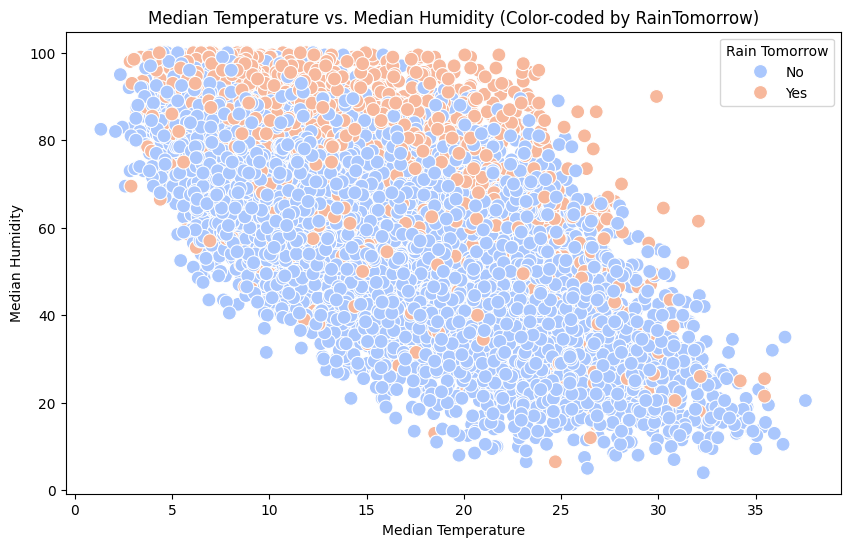

In [4]:
# Drop rows with missing values for necessary columns
filtered_df = victoria_df[['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm', 'RainTomorrow']].dropna()

# Calculate median temperature and humidity
filtered_df['MedianTemp'] = filtered_df[['MinTemp', 'MaxTemp']].median(axis=1)
filtered_df['MedianHumidity'] = filtered_df[['Humidity9am', 'Humidity3pm']].median(axis=1)

# Scatter plot of MedianTemp vs. MedianHumidity, color-coded by RainTomorrow
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MedianTemp', y='MedianHumidity', hue='RainTomorrow', data=filtered_df, palette='coolwarm', s=100)
plt.title('Median Temperature vs. Median Humidity (Color-coded by RainTomorrow)')
plt.xlabel('Median Temperature')
plt.ylabel('Median Humidity')
plt.legend(title='Rain Tomorrow')
plt.show()

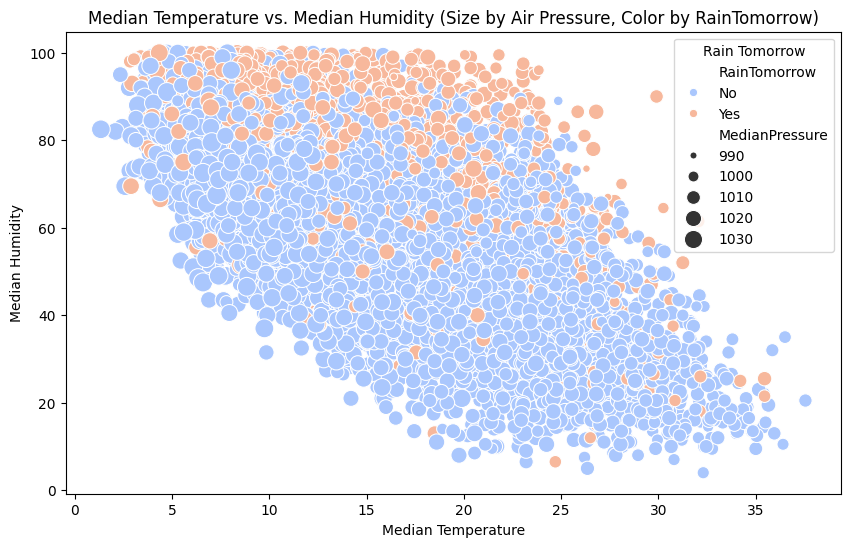

In [5]:
# Drop rows with missing values for necessary columns (including air pressure)
filtered_df = victoria_df[['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'RainTomorrow']].dropna()

# Calculate median temperature, humidity, and air pressure
filtered_df['MedianTemp'] = filtered_df[['MinTemp', 'MaxTemp']].median(axis=1)
filtered_df['MedianHumidity'] = filtered_df[['Humidity9am', 'Humidity3pm']].median(axis=1)
filtered_df['MedianPressure'] = filtered_df[['Pressure9am', 'Pressure3pm']].median(axis=1)

# Scatter plot of MedianTemp vs. MedianHumidity, color-coded by RainTomorrow, and showing air pressure
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MedianTemp', y='MedianHumidity', hue='RainTomorrow', size='MedianPressure', data=filtered_df, palette='coolwarm', sizes=(20, 200))
plt.title('Median Temperature vs. Median Humidity (Size by Air Pressure, Color by RainTomorrow)')
plt.xlabel('Median Temperature')
plt.ylabel('Median Humidity')
plt.legend(title='Rain Tomorrow')
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
X = filtered_df[['MedianTemp']]  # Features 
y = filtered_df['MedianHumidity']  # Target 

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 190.60388157079214
R² Score: 0.42467317181958264


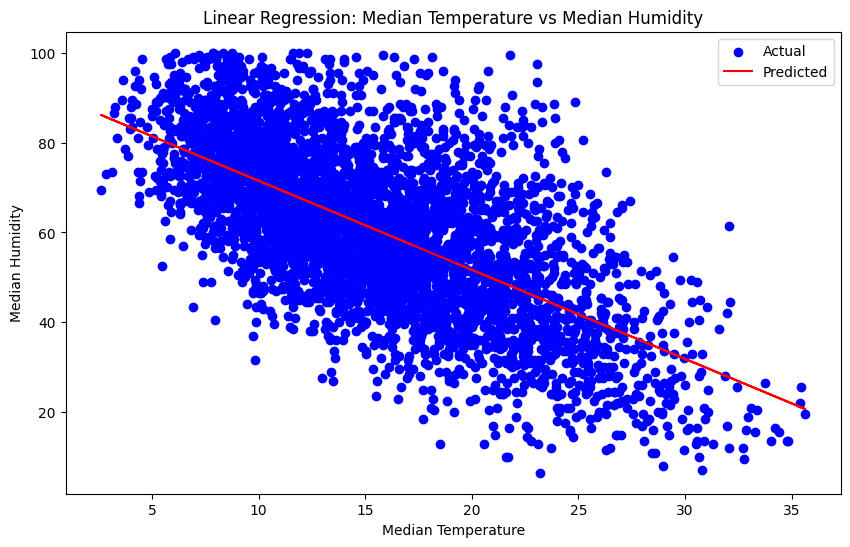

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Linear Regression: Median Temperature vs Median Humidity')
plt.xlabel('Median Temperature')
plt.ylabel('Median Humidity')
plt.legend()
plt.show()

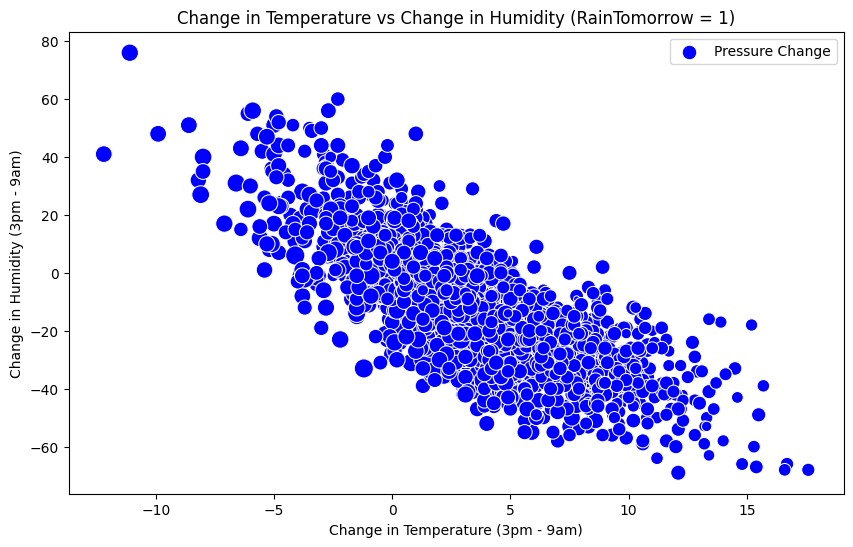

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing values for necessary columns
filtered_df = victoria_df[['Temp9am', 'Temp3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'RainTomorrow']].dropna()

# Encode 'RainTomorrow' as 0 and 1 if necessary
if filtered_df['RainTomorrow'].dtype == 'object':  # Check if it's not already numeric
    filtered_df['RainTomorrow'] = filtered_df['RainTomorrow'].map({'Yes': 1, 'No': 0})

# Calculate changes in temperature, humidity, and air pressure
filtered_df['TempChange'] = filtered_df['Temp3pm'] - filtered_df['Temp9am']  # Change in temp from 9am to 3pm
filtered_df['HumidityChange'] = filtered_df['Humidity3pm'] - filtered_df['Humidity9am']
filtered_df['PressureChange'] = filtered_df['Pressure3pm'] - filtered_df['Pressure9am']

# Split the data for RainTomorrow = 1 (Yes, it will rain) and RainTomorrow = 0 (No, it won't rain)
rain_yes = filtered_df[filtered_df['RainTomorrow'] == 1]
rain_no = filtered_df[filtered_df['RainTomorrow'] == 0]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TempChange', y='HumidityChange', size='PressureChange', data=rain_yes, sizes=(20, 200), color='blue')
plt.title('Change in Temperature vs Change in Humidity (RainTomorrow = 1)')
plt.xlabel('Change in Temperature (3pm - 9am)')
plt.ylabel('Change in Humidity (3pm - 9am)')
plt.legend(['Pressure Change'])
plt.show()

